In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv("Student_Performance.csv")
print(df)

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      Sample Question Papers Practiced 

Dependent variable (Target): Performance Index
Mean Squared Error: 326.22409423895004
Mean Absolute Error: 15.585068505356652
R-squared: 0.1456738704933943
Intercept: 40.43863833990771
Coefficients: [2.73343445 0.21467185]
Coefficient for Hours Studied: 2.7334344506813246
Coefficient for Sample Question Papers Practiced: 0.2146718518920637


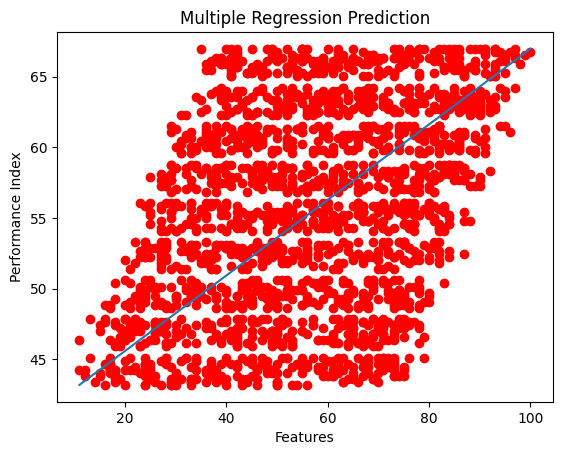

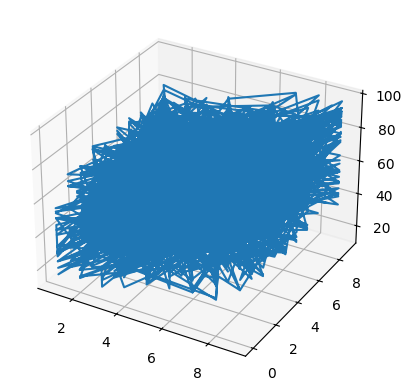

In [5]:
# Define the independent variables (features) and the dependent variable (target)
X = df[["Hours Studied","Sample Question Papers Practiced"]]
Y = df["Performance Index"]

# Display the dependent variable name
print("Dependent variable (Target):", Y.name)

# Split the data into training and test sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, shuffle=True)
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(xtrain, ytrain)
# Predict the test set results
ypred = model.predict(xtest)

# Calculate and display evaluation metrics
print('Mean Squared Error:', mean_squared_error(ytest, ypred))
print('Mean Absolute Error:', mean_absolute_error(ytest, ypred))
print('R-squared:', r2_score(ytest, ypred))
# Display the model's intercept and coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
# Display the coefficient for each feature
features = X.columns
for feature, coef in zip(features, model.coef_):
    print(f"Coefficient for {feature}: {coef}")
    
# Plotting the results
plt.scatter(ytest,ypred,color="red")
plt.plot([min(ytest),max(ytest)],[min(ypred),max(ypred)])
plt.xlabel("Features")
plt.ylabel("Performance Index")
plt.title("Multiple Regression Prediction")
plt.show()

ax=plt.axes(projection="3d")
ax.plot3D(xtest["Hours Studied"],xtest["Sample Question Papers Practiced"],ytest)
plt.show()